In [1]:
import json
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import mne

%matplotlib inline

In [2]:
file_path = r'C:\Users\phili\EEG_project\EEG_proj_data\ucsd-neural-data-challenge\data\test'
filename = 'B0104E.csv'
full_path = os.path.join(file_path, filename)

df = pd.read_csv(full_path)

print(df.head())

   time        C3        Cz        C4   EOG:ch01   EOG:ch02   EOG:ch03  \
0     0 -3.052503 -3.028083 -1.123321 -47.374847  -4.395604  46.398046   
1     4 -2.979243 -0.634921 -1.074481 -47.374847 -13.186813  34.188034   
2     8 -2.954823 -0.219780 -0.586081 -39.560440  -8.302808  33.699634   
3    12 -2.173382  0.439560 -1.147741 -28.327228   2.442002  36.630037   
4    16 -2.026862  1.807082 -1.318681 -23.443223  -3.418803  35.164835   

   EventStart  
0           0  
1           0  
2           0  
3           0  
4           0  


In [3]:
time = df['time'].values
channels = df.drop(columns=['time','EventStart'])



In [7]:
time = df['time'].values
eeg_data = df[['C3', 'Cz', 'C4']].values
eog_data = df[['EOG:ch01', 'EOG:ch02', 'EOG:ch03']].values
events = df[['time', 'EventStart']].dropna()


fs = 250  

eeg_channel = ['C3', 'Cz', 'C4']
eog_channel = ['EOG:ch01', 'EOG:ch02', 'EOG:ch03']
all_channel = eeg_channel_names + eog_channel_names
all_channel= ['eeg'] * len(eeg_channel_names) + ['eog'] * len(eog_channel_names)

# Combine EEG and EOG data
combined_data = np.hstack((eeg_data, eog_data))

# Check the dimensions
print("Number of channels in data:", combined_data.shape[1])
print("Number of channel names:", len(all_channel_names))

# Ensure the number of channels in data matches the number of channel names
if len(all_channel_names) != combined_data.shape[1]:
    raise ValueError(f"Number of channel names ({len(all_channel_names)}) does not match number of channels in data ({combined_data.shape[1]}).")

Number of channels in data: 6
Number of channel names: 6


Creating RawArray with float64 data, n_channels=6, n_times=466314
    Range : 0 ... 466313 =      0.000 ...  1865.252 secs
Ready.


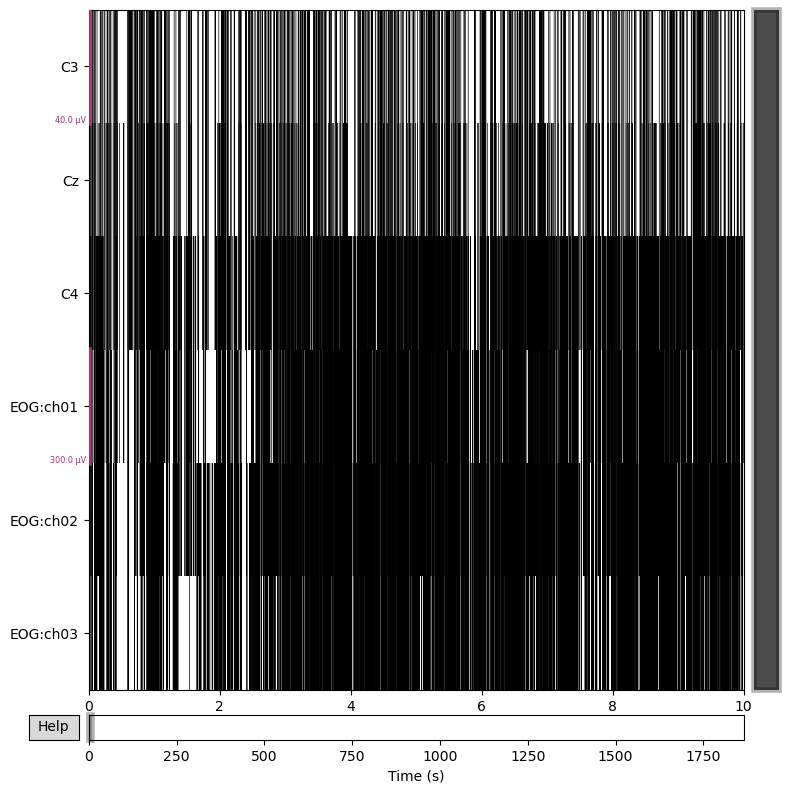

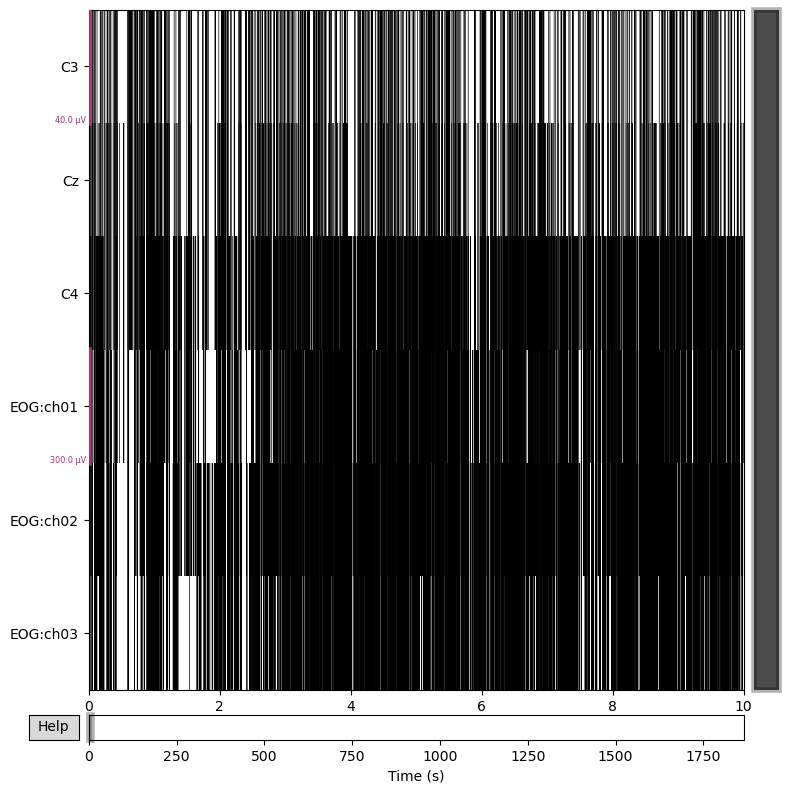

In [10]:
combined_data = np.hstack((eeg_data, eog_data))

# Create info structure needed for MNE
info = mne.create_info(ch_names=all_channel_names, sfreq=fs, ch_types=all_channel_types)

# Create RawArray object
raw = mne.io.RawArray(combined_data.T, info)

# Plot raw EEG signals
raw.plot()

In [ ]:
#preprocessing
raw.filter(l_freq=1.0, h_freq=40.0)
